# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [4]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv('instacart_orders.csv', sep = ';')
df_products = pd.read_csv('products.csv', sep = ';')
df_orders = pd.read_csv('order_products.csv', sep = ';')
df_aisles = pd.read_csv('aisles.csv', sep = ';')
df_departments = pd.read_csv('departments.csv', sep = ';')


In [6]:
# mostrar información del DataFrame
df_instacart.info()
df_instacart.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
366479,2977153,11240,23,0,10,11.0
381100,3388934,118053,14,4,12,14.0
335377,3045829,171065,1,3,21,NaN
376791,2063969,20643,7,1,21,2.0
119841,1958013,153319,1,1,18,NaN


In [7]:
# mostrar información del DataFrame
df_products.info()
df_products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
16954,16955,Buffalo Wing Cooking Sauce,5,13
47982,47983,Organic Milkmaid Tea,94,7
46276,46277,Organix Cat Treats,41,8
19151,19152,Good Buddy Cookies Cheddar Cheese Flavor,40,8
20503,20504,Cheese Creations Double Cheddar Sauce,9,9


In [8]:
# mostrar información del DataFrame
df_orders.info(show_counts= True) #Al ser un DF con muchas entradas, info no arroja los valores no nulos
df_orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
1618756,1543663,31717,6.0,1
1554948,1715683,39581,3.0,1
4036548,2145815,23734,6.0,1
1120288,2024293,27521,11.0,0
1798403,3067156,32655,7.0,1


In [9]:
# mostrar información del DataFrame
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
# mostrar información del DataFrame
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

El DF 'instacart' en la columna 'days_since_prior_order' tiene 28,819 valores nulos representan el 6% de la información de la columna. 
El DF 'productos' en la columna 'product_name' tiene 1258 valores nulos representan el 2.5% de la información de la columna.
El DF 'order' en la columna 'add_to_cart_order' tiene 836 valores nulos representan el 0.01% de la información de la columna.


Las tablas comparten información similar respecto a las demás tablas, por ejemplo:

* Las columnas 'order_id' de las tablas instacart y orders, podríamos usar merge() en ambos DF 
* El DF de 'products' y el df de 'order_products' comparten el mismo nombre de columna 'product_id' podemos unir ambos DF
* El DF de 'products' y el df de 'aisles' comparten la columna 'aisle_id' podemos concatenar por columna
* El DF de 'products' y el df de 'departments' comparten la columna 'department_id' podemos concatenar por columna


En la columna 'days_since_prior_order' está en flotante y estamos midiendo días, lo ideal sería cambiarlo a Dato tipo int y cambiaría el valor
de 'order_dow' a los días como tal(Monday, Tuesday, etc) para hacer la información más digerible.
La columna 'add_to_cart_order' del df 'orders' está en valor tipo flotante, podemos cambiarlo a entero sabiendo que es que es el orden secuencial en que se añadieron productos al carrito

De la columna 'department_id' del df 'departments' unimos al df 'products', del df 'products' podemos unir la columna 'aisle_id' al df 'aisles', y también podemos unir la columna 'product_id' con el df 'orders' y del df 'orders' podemos unir al df 'instacart' mediante la columna 'order_id'.

**Podemos juntar la información de todas las tablas en un sólo DF si unimos los datos de la manera correcta, esto nos permitirá tener a detalle cada orden, inclusive podemos categorizar por departamento y por pasillo respecto al producto que se esté comercializando, de esa manera podemos extraer más información, por ejemplo, los productos más vendidos, el día con mayor venta, la hr preferida para las consumidores para comprar, el departamento y pasillo con más productos vendidos y de igual manera la otra cara, los productos menos vendidos, el día y hr menos preferidos para los consumidores, departamentos y pasillos con menor interés, etc.**

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [11]:
# Revisa si hay pedidos duplicados
df_instacart.duplicated().sum()

np.int64(15)

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [12]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart[df_instacart.duplicated()]
#Que todos los pedidos duplicados se realizaron en Miércoles a las 2:00 a.m.
# los cliente con la cantidad de veces ordenadas 'order_number' = 1 tienen por defecto NaN en 'days_since_prior_order' al ser su primera compra


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Qué sugiere este resultado?

Que pudo haber alguna falla en el sistema que no estuviese registrando bien los pedidos o bien que por un periodo algunos pedidos registrados el miércoles a las 2:00 am fueron duplicados.

In [13]:
# Elimina los pedidos duplicados
df_instacart = df_instacart.drop_duplicates().reset_index(drop = True)

In [14]:
# Vuelve a verificar si hay filas duplicadas
df_instacart.duplicated().sum()

np.int64(0)

In [15]:
# Vuelve a verificar si hay IDs duplicados de pedidos
df_duplicados_pedidos = df_instacart['order_id'].duplicated().sum()
df_duplicados_pedidos

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos

Primero buscamos si había duplicados en el DF de 'df_instacart'
Posterior a ello los ubicamos para conocer si tenían alguna relación
encontramos pedidos duplicados en día Miércoles a las 2:00 am.
Posterior a ello procedimos a eliminar los duplicados
Y revisamos si aún teníamos duplicados.

### `products` data frame

In [16]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

np.int64(0)

In [17]:
# Verifica si hay IDs duplicadas de productos
df_id = df_products['product_id'].duplicated().sum()
df_id

np.int64(0)

In [18]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products['product_name'])

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


In [19]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products['product_name'].duplicated().sum()

np.int64(1361)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

El Dataframe de products no contaba con valores duplicados, sin embargo, la columna 'product_name' tenía algunos duplicados implícitos que se solucionaron cambiando todos los nombres en Mayúsculas.

### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

np.int64(0)

In [21]:
# Revisa si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DF de departments no tenemos valores nulos, cada departamento tiene un valor asignado, inclusive el departamento con información perdida.

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

np.int64(0)

In [23]:
# Revisa si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

El df 'aisles' no tiene valores nulos, cada pasillo está asignado a un número de ID.

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
df_orders.duplicated().sum()

np.int64(0)

In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_orders['order_id'].value_counts()

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
1933026      1
2528686      1
2273859      1
3369939      1
818830       1
Name: count, Length: 450046, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este DF no encontré duplicados, supuse que la columna de order_id era única, pero utilicé la función nunique() para visualizar la cantidad de valores únicos y el total fue de 450,046 órdenes, posterior a ello utilicé value_counts() para revisar la frecuencia de las órdenes y la órden 61355 aparece 127 veces, la asigné a un nuevo DF para ver si encontraba algún duplicado pero nada, sólo los productos ordenados pero al final no son duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [26]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos.

Tenemos 1258 valores nulos en la columna 'product_name', probablemente estén relacionados con el ID 100.

In [27]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_pasillo_100 = df_products[df_products['aisle_id'] == 100]
df_pasillo_100['aisle_id'].count()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos.

La suposición es correcta, son productos con valores NaN que no tienen un nombre de identificador y se asignan al pasillo 100 de 'missing'.

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_depto_21 = df_products[df_products['department_id'] == 21]
df_depto_21['department_id'].count()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos.

Los 1258 valores nulos pertecenen al departamento 21 de 'missing'

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_id_21 = df_departments[df_departments['department_id'] == 21]['department']
df_aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]['aisle']

print(df_id_21)
print(df_aisle_100)

20    missing
Name: department, dtype: object
99    missing
Name: aisle, dtype: object


Describe brevemente cuáles son tus hallazgos.

Los productos con nombres ausentes pertenecen a un pasillo y departamentos desconocidos.
La cantidad de valores en la columna 'aisle_id' = 100 es de 1258 y la cantidad de valores en la columna 'department_id' = 21 es de 1258, la misma que la cantidad de valores nulos en 'product_name' 

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontramos valores ausentes en la columna product_name, estos correspondían al pasillo 100 y al departamento 21 con información desconocida, reemplazamos estos valores con un string de 'desconocido'.

### `instacart` data frame

In [31]:
# Encuentra los valores ausentes
df_instacart.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [32]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
valores_unicos = df_instacart['days_since_prior_order'].sort_values().unique()
df_instacart['days_since_prior_order'] = df_instacart['days_since_prior_order'].fillna('first_purchase')
print(valores_unicos)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. nan]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los clientes que apenas realizan su primer pedido tienen valor 1 en 'order_number' y 'NaN' en la columna 'days_since_prior_order', lo comprobé utilizando un bucle y un filtrado mediante isin():


floor = []
x = 1
while x < 65:
    float(x)
    floor.append(x)
    x += 1.0

df_nan = df_instacart[~df_instacart['days_since_prior_order'].isin(floor)][['days_since_prior_order','order_id','user_id', 'order_number', 'order_dow', 'order_hour_of_day']]
df_nan

Adicional eliminé los valores ausente y los cambié por el string 'first_purchase'
df_instacart['days_since_prior_order'] = df_instacart['days_since_prior_order'].fillna('first_purchase')


### `order_products` data frame

In [33]:
# Encuentra los valores ausentes
df_orders.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [34]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor mínimo para add_to_cart es de: ', df_orders['add_to_cart_order'].min())
print('Valor máximo para add_to_cart es de:',  df_orders['add_to_cart_order'].max())

Valor mínimo para add_to_cart es de:  1.0
Valor máximo para add_to_cart es de: 64.0


Describe brevemente cuáles son tus hallazgos.

El valor mínimo en 'add_to_cart_order' corresponde a 1 esto pueder ser para identificar los carros con productos ordenados teniendo como límite máximo de 64 productos por carrito y el valor NaN puede ser porque sólo se eligió el producto pero no se creó un carro de compra.

In [35]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
f = []
x = 1
while x < 65:
    float(x)
    f.append(x)
    x += 1.0

df_id = df_orders[~df_orders['add_to_cart_order'].isin(f)]['order_id'].unique()
print(len(df_id))
df_id

70


array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [36]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
new_df = df_orders[df_orders['order_id'].isin(df_id)]
new_df_1 = new_df.groupby('order_id')['product_id'].count()
print(new_df_1.sort_values())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(new_df_1.sort_values().unique())
print('El valor mínimo de productos ordenados es de 65')
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print('Si, todos los pedidos con valores ausentes tienen más de 64 productos')

order_id
9310        65
747668      65
888470      65
2621907     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64
[ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  80  85  86  87
  91  92  95  98 104 108 115 127]
El valor mínimo de productos ordenados es de 65
Si, todos los pedidos con valores ausentes tienen más de 64 productos


Describe brevemente cuáles son tus hallazgos.

La cantidad de órdenes con valores ausentes es de 70.
Las órdenes con valores ausentes tienen más de 64 productos. descubrimos que el contador secuencial de productos agregados va de 1 a 64, entonces, todos los valores con más de 64 productos tienen valores nulos, porque la columna no los identifica como un valor permitido, tendríamos que ampliar el rango para evitar esos valores nulos.

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_orders['add_to_cart_order'] = df_orders['add_to_cart_order'].fillna(999)
df_orders['add_to_cart_order'] = df_orders['add_to_cart_order'].astype(int)
df_orders.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Descubrimos que el contador secuencial de productos agregados va de 1 a 64, entonces, todos los valores con más de 64 productos tienen valores nulos, porque la columna no los identifica como un valor permitido.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Los valores ausentes que tenemos en 'product_name' pertenecen al pasillo y departamento de información faltante, una vez que se identifiquen podremos eliminar esos valores desconocidos, adicional el contador secuencial de productos sólo va de 1 a 64, por lo que no asigna un valor a las compras con más de 64 productos, si extendiéramos el contador podríamos evitar estos valores ausentes o bien, restringir el límite de productos por orden a máximo 64.

Tambien en la columna 'days_since_prior_order' tuvimos valores ausentes, esto debido a que no hay un valor asignado para aquelos clientes qur compran por primera vez, deberíamos establecer un valor para esa primera compra.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
df_instacart['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [39]:
df_instacart['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

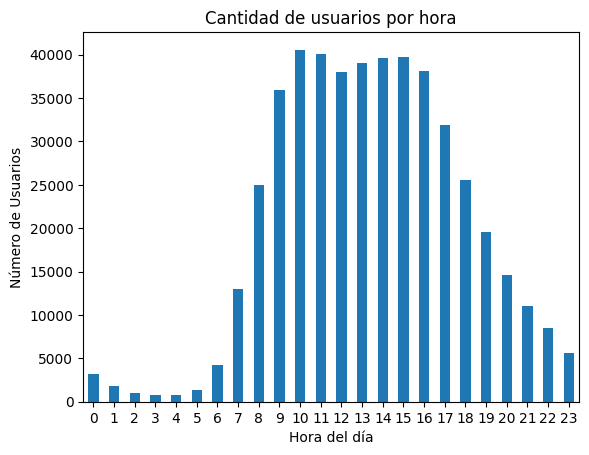

In [40]:
pedidos_hora_dia = df_instacart.groupby('order_hour_of_day')['user_id'].count()

pedidos_hora_dia.plot(title = 'Cantidad de usuarios por hora' ,xlabel = 'Hora del día', ylabel = 'Número de Usuarios', kind = 'bar', rot = 0)                 
plt.show()

Escribe aquí tus conclusiones

Las hrs preferidas por los usuarios para hacer sus compras es entre las 9 am y 16:00 pm, las hrs con menor afluencia son de la media noche a las 6:00 am

### [A3] ¿Qué día de la semana compran víveres las personas?

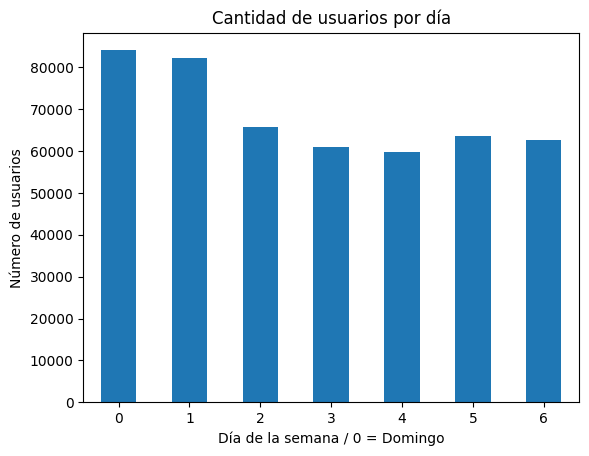

In [41]:
compras_dia = df_instacart.groupby('order_dow')['user_id'].count()

compras_dia.plot(title = 'Cantidad de usuarios por día', xlabel = 'Día de la semana / 0 = Domingo', ylabel = 'Número de usuarios',kind = 'bar', rot = 0)

plt.show()

Escribe aquí tus conclusiones

Los días preferidos por las personas son el Domingo y el Lunes, sin embargo, la cantidad de personas que compra en los demás días no son bajas, las cantidades son cercanas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

2640
51337


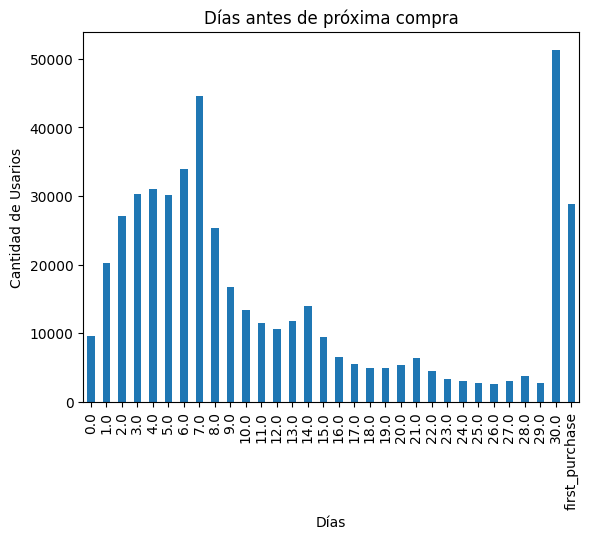

In [42]:
days_next_shop = df_instacart.groupby('days_since_prior_order')['user_id'].count()

print(days_next_shop.min())
print(days_next_shop.max())

days_next_shop.plot(title= 'Días antes de próxima compra', xlabel= 'Días' , ylabel= 'Cantidad de Usarios', kind = 'bar')

plt.show()

Escribe aquí tus conclusiones

La gente prefiere realizar sus compras cada 30 días, esto puede ser por su cobro de salario mensual o bonificación de prestaciones para compra de víveres.
El día 26 es el menor, esto puede ser porque la genta ya destinó su salario al pago de servicios y víveres mensual y está en espera del próximo cobro.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
dist_days = df_instacart.groupby(['order_dow','order_hour_of_day'])['user_id'].count()

In [44]:
dia_mier = dist_days.loc[3]

In [45]:
dia_sat = dist_days.loc[6]

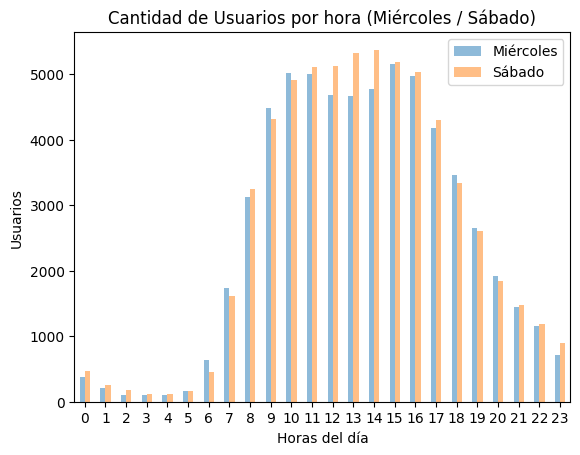

In [46]:
df_combined = pd.DataFrame({'Miércoles': dia_mier,
                            'Sábado': dia_sat}
                           )

df_combined.plot(title='Cantidad de Usuarios por hora (Miércoles / Sábado)',
                 xlabel = 'Horas del día',
                 ylabel = 'Usuarios',
                 kind = 'bar',
                 alpha = 0.5,
                 rot = 0
                 )

plt.show()

Escribe aquí tus conclusiones

Las gráficas siguen una trayectoria y distribución similar, excepto que en Miércoles hay una caída entre 11:00 y 15:00, puede estar relacionado al momento de descanso de los trabajadores.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
ordenes_por_usuario = df_instacart.groupby('user_id')['order_id'].count()

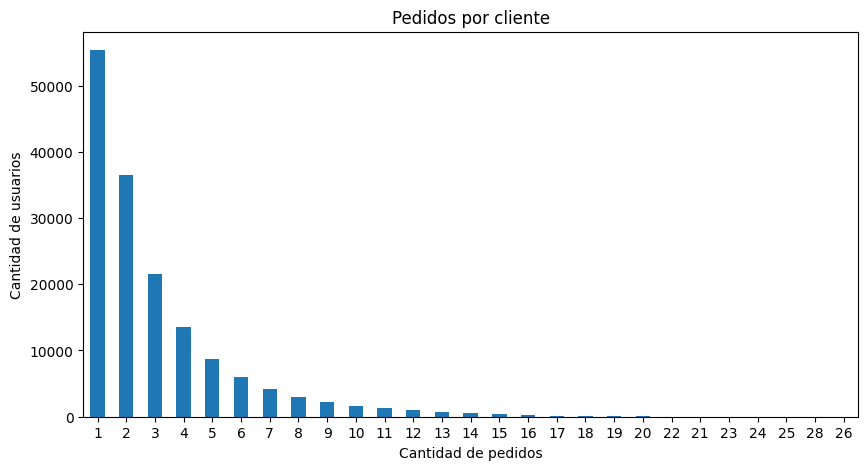

In [48]:
frecuencia_ordenes = ordenes_por_usuario.value_counts()

frecuencia_ordenes.plot(title = 'Pedidos por cliente',
                        xlabel = 'Cantidad de pedidos',
                        ylabel = 'Cantidad de usuarios',
                        kind= 'bar',
                        figsize = [10,5],
                        rot = 0
                       )

plt.show()

Escribe aquí tus conclusiones

Hay muchos cliente que realizan por primera vez su primer pedido, o que sólo realizaron una compra y no volvieron a comprar.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
product_name = df_products.merge(df_orders, on = 'product_id')

In [50]:
qty_products = product_name.groupby(['product_id', 'product_name'])['order_id'].count()

In [51]:
top_products = qty_products.sort_values(ascending=False)

top_products.head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

El TOP 20 de productos más vendidos pertecen a Frutas y verduras, probablemente mucha gente realice compras de último minuto por estos productos que no consiguió en un mercado o bien que sólo compran este tipo de productos en el Supermercado para su consumo mensual.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
product_cart = product_name.merge(df_instacart, on = 'order_id')

In [53]:
art_x_pedido = product_cart.groupby(['order_id'])['product_id'].count()

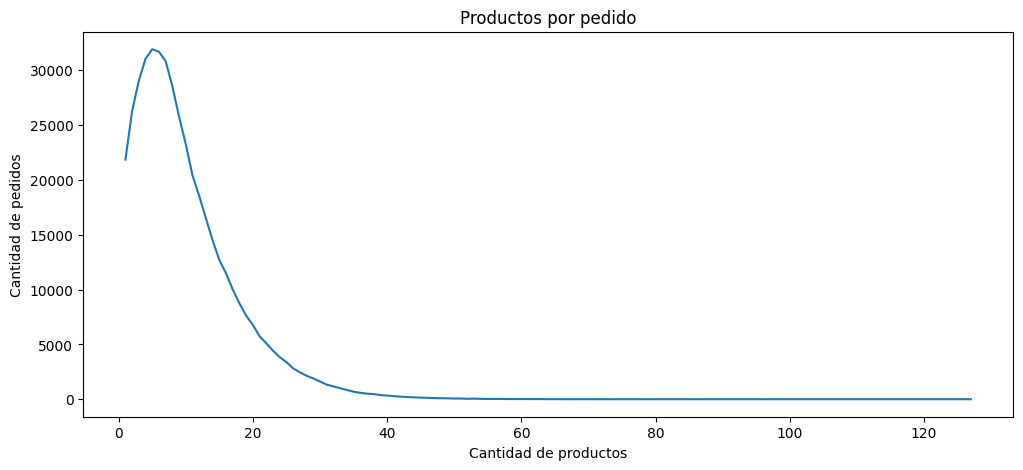

In [54]:
frecuencia_articulos = art_x_pedido.value_counts().sort_index()

frecuencia_articulos.plot(title = 'Productos por pedido',
                          xlabel = 'Cantidad de productos',
                          ylabel = 'Cantidad de pedidos',
                          
                          figsize = [12,5]
                         )

plt.show()

Escribe aquí tus conclusiones

La gente suele comprar entre 1 y 10 productos por orden, teniendo como valor más alto el de 5 productos por pedido.
Mientras más grande es la cantidad de productos por orden es menor la frecuencia.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
product_cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   product_id              int64 
 1   product_name            object
 2   aisle_id                int64 
 3   department_id           int64 
 4   order_id                int64 
 5   add_to_cart_order       int64 
 6   reordered               int64 
 7   user_id                 int64 
 8   order_number            int64 
 9   order_dow               int64 
 10  order_hour_of_day       int64 
 11  days_since_prior_order  object
dtypes: int64(10), object(2)
memory usage: 416.1+ MB


In [56]:
reorder = product_cart[product_cart['reordered'] == 1]
reorder_products = reorder['product_id'].value_counts().head(20)

top_reorder_products = product_cart[product_cart['product_id'].isin(reorder_products.index)][['product_id','product_name']].drop_duplicates()

print(top_reorder_products)

         product_id              product_name
472335         5876             ORGANIC LEMON
668493         8277  APPLE HONEYCRISP ORGANIC
1057535       13176    BAG OF ORGANIC BANANAS
1375650       16797              STRAWBERRIES
1758703       21137      ORGANIC STRAWBERRIES
1871602       21903      ORGANIC BABY SPINACH
1992689       22935      ORGANIC YELLOW ONION
2165829       24852                    BANANA
2237416       24964            ORGANIC GARLIC
2346518       26209                     LIMES
2526791       27845        ORGANIC WHOLE MILK
2551927       27966       ORGANIC RASPBERRIES
2588589       28204        ORGANIC FUJI APPLE
3525049       39275       ORGANIC BLUEBERRIES
4062737       45007          ORGANIC ZUCCHINI
4271572       47209      ORGANIC HASS AVOCADO
4321233       47626               LARGE LEMON
4355690       47766           ORGANIC AVOCADO
4493027       49235       ORGANIC HALF & HALF
4531171       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

El TOP de productos preferidos y reordenados es muy similar, pertecenen al segmento de frutas y verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
total_orders = df_orders['product_id'].value_counts()
total_reorder = df_orders[df_orders['reordered'] == 1]['product_id'].value_counts()
reorder_proportion = total_reorder / total_orders
reorder_proportion_df = pd.DataFrame(reorder_proportion).reset_index()

In [58]:
reorder_proportion_df.columns = ['product_id', 'reorder_proportion']
reorder_df = df_products[['product_id', 'product_name']].merge(reorder_proportion_df, on = 'product_id')
reorder_df

,product_id,product_name,reorder_proportion
0,1,CHOCOLATE SANDWICH COOKIES,0.564286
1,2,ALL-SEASONS SALT,NaN
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


Escribe aquí tus conclusiones

La gama de proporciones de reordenamiento muestra una diversidad en cómo los clientes perciben la necesidad de volver a comprar ciertos productos.

Productos con proporciones cercanas a 0.4 a 0.6, indican una reordenación moderada, sugiriendo que los clientes pueden estar divididos en cuanto a su decisión de volver a comprar estos productos, productos entre 0.7 y 1 tienen una alta ordenación o preferencia por los clientes, teniendo un fuerte interés en volver a comprarlos y los productos con proporciones de 0 a 0.3 indican una reordenación baja, indicando que una vez comprados los clientes no tienen una buena experiencia con el producto y no vuelven a comprarlos, los productos con valores NaN pueden ser productos que nunca se hayan comprado o que falte información para un correcto análisis.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
productos_reordenados_cliente =  product_cart.groupby(['user_id', 'product_id'])['reordered'].count()
total_productos_por_cliente = product_cart.groupby('user_id')['product_id'].count()
proporción_cliente = productos_reordenados_cliente / total_productos_por_cliente

In [60]:

proporción_cliente_df = pd.DataFrame(proporción_cliente)
proporción_cliente_df

0
user_id product_id          
2       9681        0.038462
        12000       0.038462
        13176       0.038462
        16589       0.038462
        20574       0.038462
...                      ...
206209  39216       0.040000
        40992       0.040000
        41213       0.040000
        41665       0.040000
        43961       0.040000

[3381866 rows x 1 columns]

Escribe aquí tus conclusiones

Mientras mayor sea la cantidad de veces que se ordena un producto, mayor es la proporción de ese producto para cada cliente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
first_product = df_orders[df_orders['add_to_cart_order'] == 1]
first_product_order = first_product['product_id'].value_counts().reset_index()

In [62]:
combined = first_product_order.merge(df_products, on = 'product_id')
combined.columns = ['count', 'product_id', 'product_name', 'aisle_id', 'department_id']
combined.columns

Index(['count', 'product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [63]:
combined.head(20)

,count,product_id,product_name,aisle_id,department_id
0,24852,15562,BANANA,24,4
1,13176,11026,BAG OF ORGANIC BANANAS,24,4
2,27845,4363,ORGANIC WHOLE MILK,84,16
3,21137,3946,ORGANIC STRAWBERRIES,24,4
4,47209,3390,ORGANIC HASS AVOCADO,24,4
5,21903,3336,ORGANIC BABY SPINACH,123,4
6,47766,3044,ORGANIC AVOCADO,24,4
7,19660,2336,SPRING WATER,115,7
8,16797,2308,STRAWBERRIES,24,4
9,27966,2024,ORGANIC RASPBERRIES,123,4


Escribe aquí tus conclusiones

Los primeros objetos añadidos al carrito pertencen al departamento de personal_care, puede ser que este pasillo esté al inicio de la tienda y es por ello que sus artículos tiendan a ser seleccionados como primeros.

### Conclusion general del proyecto:

* Los días preferidos por los usuarios para realizar compras son los Domingos y Lunes en un horario preferencia de 9:00 am a 16:00 pm.
* Los clientes tienden a esperar un mes o al cobro de su salario para comprar los productos que necesiten
* Los productos preferidos por los clientes pertenecen al departamento de frutas y verduras, y son similares a los que se reordenan, esto puede significar que mucha gente prefiere este lugar para realizar sus compras para preparación de alimentos o que sean productos frescos